In [15]:
import pandas as pd
import plotly.express as px
import panel as pn

pn.extension('plotly')

In [2]:
df = pd.read_csv('online_retail.csv')

df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


In [3]:
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [39]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format="%Y%M")
df['Year'] = df['InvoiceDate'].dt.year
df['Month'] = df['InvoiceDate'].dt.month_name()

In [33]:
df.shape

(536641, 11)

In [34]:
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
Year                    int32
TotalSales            float64
Month                   int32
dtype: object

In [35]:
print("Total null values:", df.isnull().sum())
print("Total duplicates", df.duplicated().sum())

Total null values: InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
Year           0
TotalSales     0
Month          0
dtype: int64
Total duplicates 0


In [36]:
df = df.fillna(0)
df = df.drop_duplicates()

print(df.isnull().sum())
print(df.duplicated().sum())


InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
Year           0
TotalSales     0
Month          0
dtype: int64
0


In [37]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID,Year,TotalSales,Month
count,536641.000000,536641,536641.000000,536641.000000,536641.000000,536641.000000,536641.000000
mean,9.620029,2011-07-04 08:57:06.087421952,4.632656,11435.904653,2010.921771,18.123861,7.544820
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,0.000000,2010.000000,-168469.600000,1.000000
25%,1.000000,2011-03-28 10:52:00,1.250000,0.000000,2011.000000,3.750000,5.000000
50%,3.000000,2011-07-19 14:04:00,2.080000,14336.000000,2011.000000,9.870000,8.000000
75%,10.000000,2011-10-18 17:05:00,4.130000,16241.000000,2011.000000,17.400000,11.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000,2011.000000,168469.600000,12.000000
std,219.130156,NaN,97.233118,6795.044250,0.268532,380.656263,3.508696


In [38]:
df['TotalSales'] = df['Quantity'] * df['UnitPrice']
print(df['TotalSales'])

0         15.30
1         20.34
2         22.00
3         20.34
4         20.34
          ...  
541904    10.20
541905    12.60
541906    16.60
541907    16.60
541908    14.85
Name: TotalSales, Length: 536641, dtype: float64


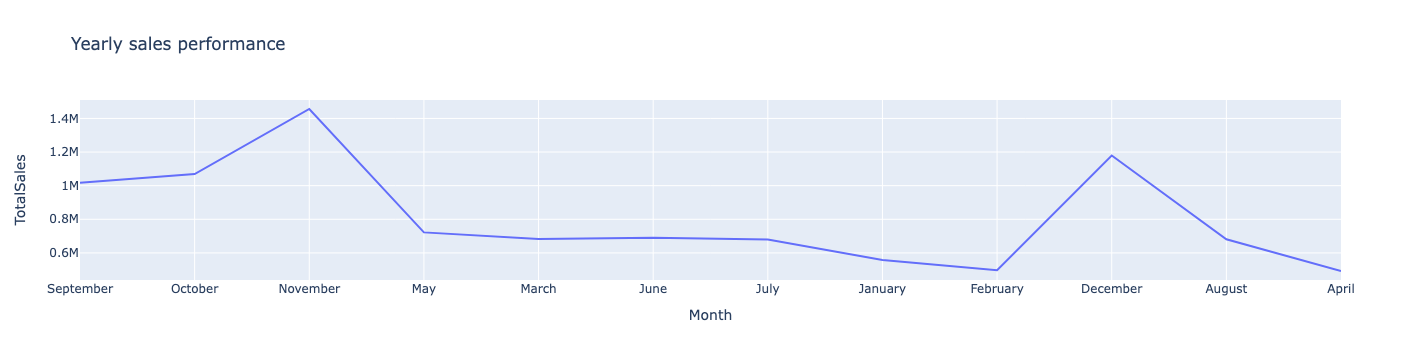

In [76]:
# Yearly sales performance
sale_trends = df.groupby('Month')['TotalSales'].sum().reset_index().sort_values(by='Month', ascending=False)
fig = px.line(sale_trends, x='Month', y='TotalSales', title='Yearly sales performance')
fig.show()

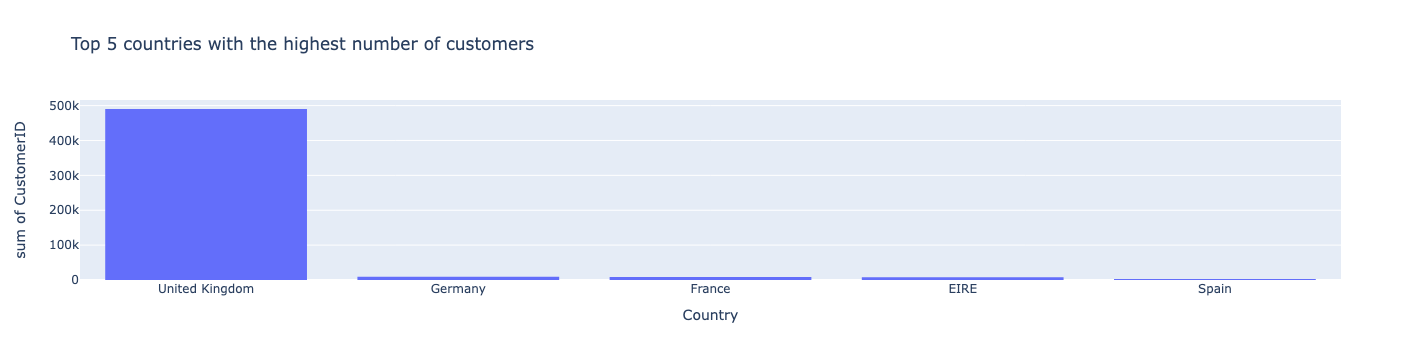

In [77]:
# Which countries have the highest number of customers?
top_country = df.groupby('Country')['CustomerID'].count().reset_index().sort_values(by='CustomerID', ascending=False).head(5)
fig1 = px.histogram(top_country, x='Country', y='CustomerID', title='Top 5 countries with the highest number of customers')
fig1.show()

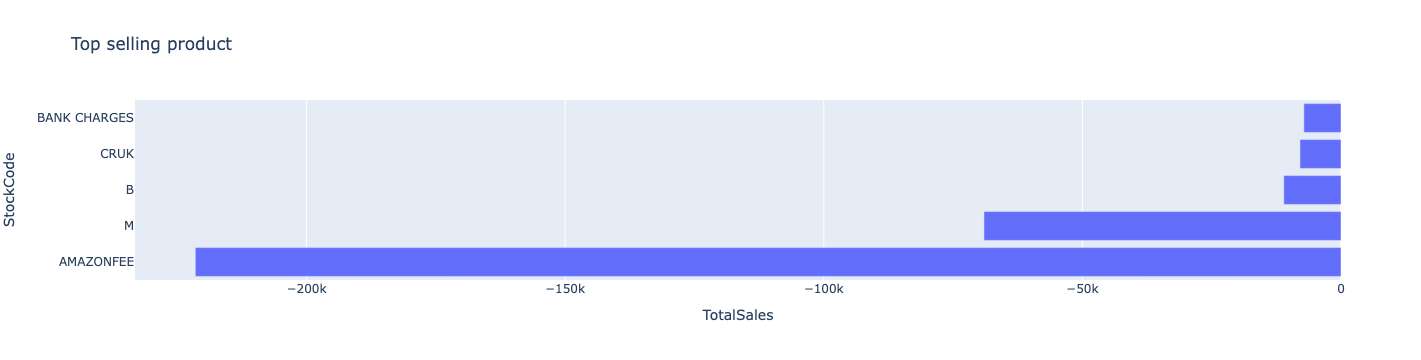

In [86]:
# What are the top-selling products?
product_revenue = df.groupby('StockCode')['TotalSales'].sum().reset_index().sort_values(by='TotalSales', ascending=True).head(5)
fig2 = px.bar(product_revenue, x='TotalSales', y='StockCode', title='Top selling product')
fig2.show()



In [101]:
pn.extension()

title = pn.pane.Markdown('Customer Segmentation Dashboard')


select = pn.widgets.Select(name='Country', options=list(df['Country'].unique()))

def update_plots(country):
    
    filtered_df = df[df['Country'] == country]
    
    
    return fig, fig1, fig2  

bind = pn.bind(update_plots, select)


dashboard = pn.Column(
    title,
    pn.Row(select),
    pn.Row(bind()[0], bind()[1]),
    pn.Row(bind()[2]) 
)

dashboard.show()



Launching server at http://localhost:52356
